<a href="https://colab.research.google.com/github/bhavu93/Project1_Fire-vs-No-Fire_ImageClassification/blob/main/CE888.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Wildfire In The Forest Image Classification** 

This program is use to train detect the fire in the forest by the drone

Now for this first we need to mount the drive, where we uploded the frems and get access directly to the colabs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now there is so many pre define libararys are and models are avilable in python that we can train and get the preferd output, but it will take some time, Now Imports some library

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, SpatialDropout2D
from keras import backend as K
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.constraints import max_norm
import numpy as np
from tensorflow.keras.layers import BatchNormalization


first define the dimention of the image, which size of image we are going to proceed

In [ ]:
image_Width, image_Hight = 128, 128
input_shape = (image_Width, image_Hight, 3)

#Get data from the Drive

In [ ]:
train_data = '/content/drive/MyDrive/Fire-Vs-No-Fire/Training'
test_data = '/content/drive/MyDrive/Fire-Vs-No-Fire/Test'
train_images = 39399
tast_images = 8617
#epochs = 2
batch_size = 16

#Define the modal input and output.

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), kernel_constraint=max_norm(3), bias_constraint=max_norm(3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), kernel_constraint=max_norm(3), bias_constraint=max_norm(3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), kernel_constraint=max_norm(3), bias_constraint=max_norm(3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


#Lets Compile The modal and check summery of modal



In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
#Summary Of model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
activation_6 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 61, 61, 32)        128       
_________________________________________________________________
activation_7 (Activation)    (None, 61, 61, 32)       

Augmentation of train data and rescaling of the test data

In [ ]:
trainimagedata = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

testimagedata = ImageDataGenerator(rescale=1. / 255)

For traning image

In [ ]:
trainimagedata = trainimagedata.flow_from_directory(
    train_data,
    target_size=(image_Width, image_Hight),
    batch_size=batch_size,
    class_mode='binary')

Found 39399 images belonging to 2 classes.


For testing image

In [ ]:
testimagedata = testimagedata.flow_from_directory(
    test_data,
    target_size=(image_Width, image_Hight),
    batch_size=batch_size,
    class_mode='binary')

Found 8617 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    trainimagedata,
    steps_per_epoch=train_images // batch_size,
    epochs=2,
    validation_data=testimagedata,
    validation_steps=tast_images // batch_size)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
2462/2462 [==============================] - 11285s 5s/step - loss: 0.2128 - accuracy: 0.9527 - val_loss: 5.8387 - val_accuracy: 0.6176
Epoch 2/2
2462/2462 [==============================] - 266s 108ms/step - loss: 0.0733 - accuracy: 0.9814 - val_loss: 3.3547 - val_accuracy: 0.7103


In [ ]:
model.save('fire_detection_model.h5')

#summarize the accuracy and history
#check all data history

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


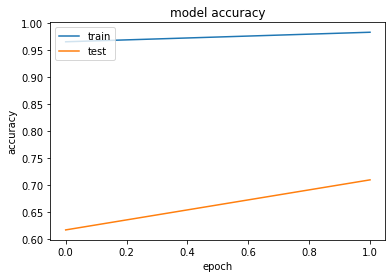

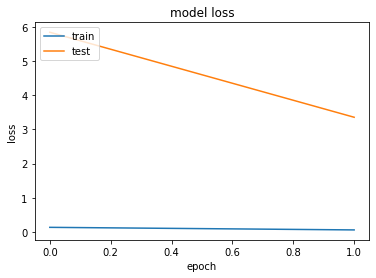

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

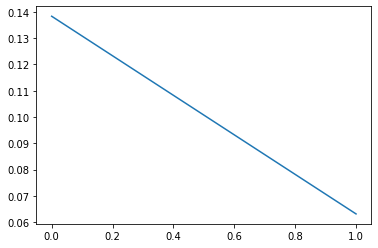

In [ ]:
plt.plot(history.history['loss'], label='train loss')

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(testimagedata, tast_images // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(testimagedata.classes, y_pred))
print('Classification Report')
target_names = ['Fire', 'No Fire']
print(classification_report(testimagedata.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[5137    0]
 [3480    0]]
Classification Report
              precision    recall  f1-score   support

        Fire       0.60      1.00      0.75      5137
     No Fire       0.00      0.00      0.00      3480

    accuracy                           0.60      8617
   macro avg       0.30      0.50      0.37      8617
weighted avg       0.36      0.60      0.45      8617



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
